In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()


df = pd.read_csv("data/s&p500_data.csv")
df_v = pd.read_csv("data/vix-daily_csv.csv")

In [3]:
merged = pd.merge(df, df_v, on="Date")

In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5876,2023-05-12,4138.540039,4143.740234,4099.120117,4124.080078,4124.080078,3533740000
5877,2023-05-15,4126.649902,4141.250000,4110.270020,4136.279785,4136.279785,3562170000
5878,2023-05-16,4127.950195,4135.540039,4109.859863,4109.899902,4109.899902,3654200000
5879,2023-05-17,4122.850098,4164.669922,4113.620117,4158.770020,4158.770020,4039080000
5880,2023-05-18,4157.680176,4202.200195,4153.500000,4198.049805,4198.049805,3980500000


In [5]:
merged.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'VIX Open', 'VIX High', 'VIX Low', 'VIX Close'],
      dtype='object')

In [6]:
X = merged[['Open', 'High', 'Low','Adj Close', 'Volume','VIX Open', 'VIX High', 'VIX Low', 'VIX Close']]
y = merged['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [8]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [9]:
train_score = rf_regressor.score(X_train, y_train)
test_score = rf_regressor.score(X_test, y_test)
print(f"Train score : {train_score}")
print(f"Test score {test_score}")

Train score : 0.9999983198589638
Test score 0.9999648187393011


In [10]:
y_pred = rf_regressor.predict(X_test)

In [11]:
r2 = r2_score(y_test, y_pred)
r2

0.9999648187393011

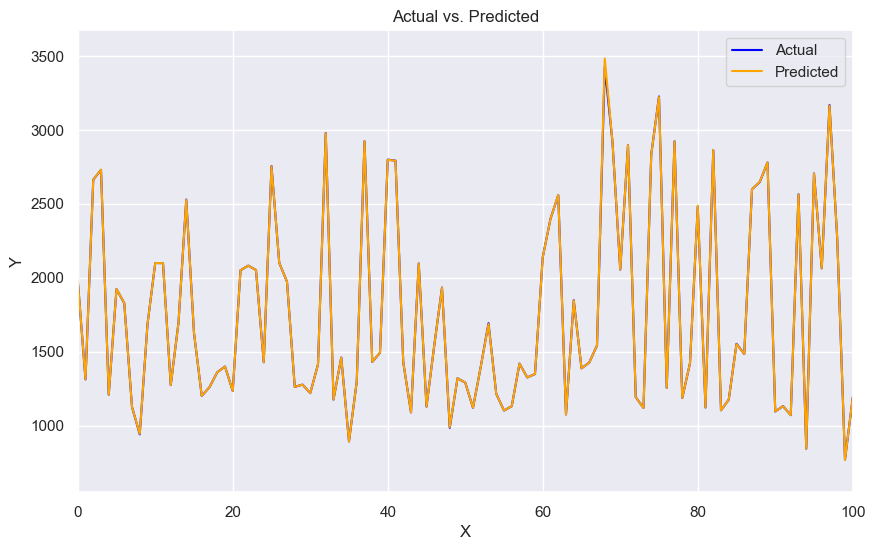

<Figure size 640x480 with 0 Axes>

In [24]:
num = range(len(y_test)) 

plt.figure(figsize=(10, 6)) 
sns.lineplot(x=num, y=y_test, label='Actual', color='blue')
sns.lineplot(x=num, y=y_pred, label='Predicted', color='orange')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted')
plt.legend()
x_min = 0  
x_max = 100  
plt.xlim(x_min, x_max)
plt.show()
plt.savefig("./static/assets/images/rand_forest.png")